In [186]:
# Import the machine learning libraries.
import numpy as np
import pandas as pd

from fbprophet import Prophet
import logging
logging.getLogger().setLevel(logging.ERROR)

import matplotlib.pyplot as plt
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import r2_score
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [187]:
# Load the Air Passengers (Number of air passengers per month) dataset.
# The dataset can be downloaded here: https://www.kaggle.com/rakannimer/air-passengers.
df = pd.read_csv('AirPassengers.csv')
print(df.shape)

(144, 2)


In [188]:
# Split the dataset into the training set and test subsets.
train, test = df[:-12], df[-12:]
print(train.shape, test.shape)

(132, 2) (12, 2)


In [189]:
df.index

RangeIndex(start=0, stop=144, step=1)

In [190]:
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [191]:
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [192]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [193]:
df.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [194]:
df.Month = pd.to_datetime(df.Month)
df = df.set_index("Month")

In [195]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [196]:
df.tail()

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


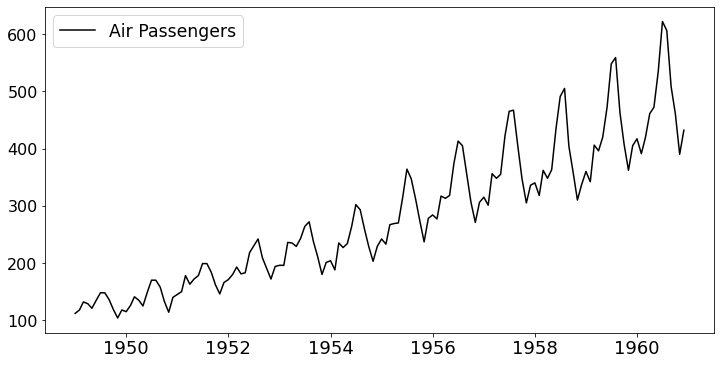

In [197]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['#Passengers'], label='Air Passengers', color='k')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

In [198]:
df = df.reset_index()
df.columns = ['ds', 'y']

In [199]:
# Split the dataset into the training set and test subsets.
prediction_size = 12
train, test = df[:-prediction_size], df[-prediction_size:]
print(train.shape, test.shape)

(132, 2) (12, 2)


In [200]:
#m = Prophet()
m = Prophet(seasonality_mode='multiplicative')
m.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [201]:
future = m.make_future_dataframe(periods=prediction_size, freq='M')
forecast = m.predict(future)

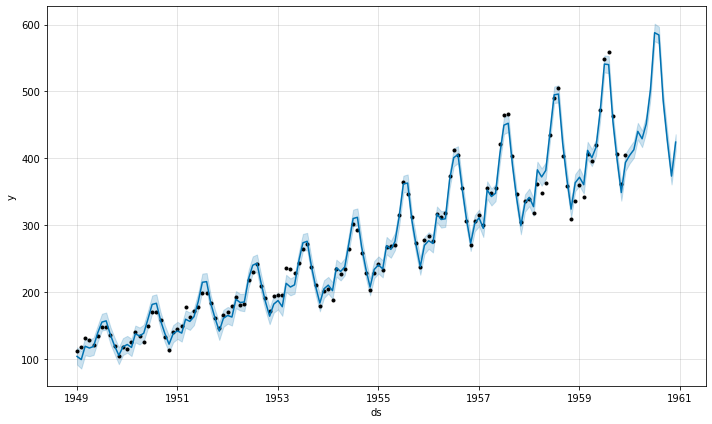

In [202]:
single_plot = m.plot(forecast)

In [203]:
m = Prophet(seasonality_mode='multiplicative')
m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


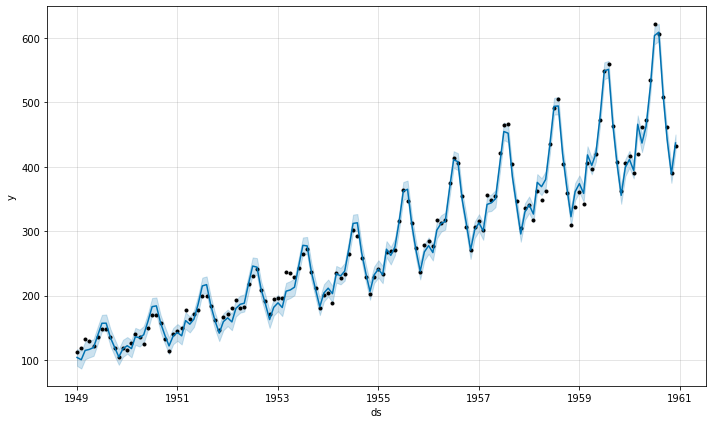

In [204]:
forecast = m.predict(future)
fig = m.plot(forecast)

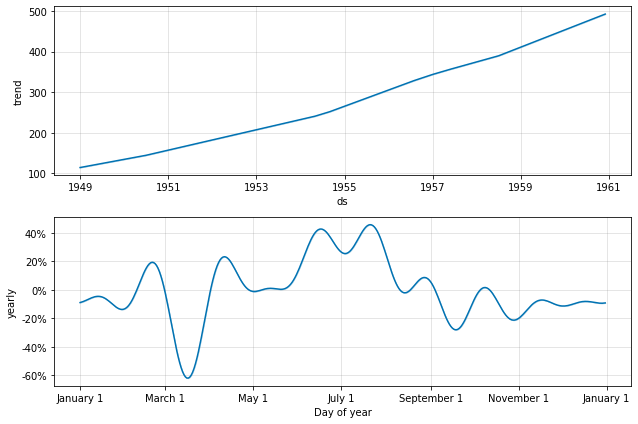

In [205]:
fig = m.plot_components(forecast)

In [206]:
metric_df = forecast.set_index('ds')[['yhat']].join(df.set_index('ds').y).reset_index()

In [207]:
metric_df

,ds,yhat,y
0,1949-01-01,103.946447,112.0
1,1949-02-01,100.440753,118.0
2,1949-03-01,114.902108,132.0
3,1949-04-01,116.507990,129.0
4,1949-05-01,119.375795,121.0
...,...,...,...
139,1960-07-31,608.657055,NaN
140,1960-08-31,513.391182,NaN
141,1960-09-30,442.333557,NaN
142,1960-10-31,388.681105,NaN


In [208]:
metric_df.dropna(inplace=True)

In [209]:
metric_df

,ds,yhat,y
0,1949-01-01,103.946447,112.0
1,1949-02-01,100.440753,118.0
2,1949-03-01,114.902108,132.0
3,1949-04-01,116.507990,129.0
4,1949-05-01,119.375795,121.0
...,...,...,...
127,1959-08-01,551.121046,559.0
128,1959-09-01,466.761554,463.0
129,1959-10-01,406.032430,407.0
130,1959-11-01,355.571080,362.0


In [210]:
# Print the R-Squared value.
r2_score(metric_df.y, metric_df.yhat)

0.9909683978690567

In [211]:
# Print the Mean Squared Error (MSE).
mean_squared_error(metric_df.y, metric_df.yhat)

101.90295053403682

In [212]:
# Print the Mean Absolute Error (MAE).
mean_absolute_error(metric_df.y, metric_df.yhat)

7.834955851201819

In [213]:
!pip install ml_metrics

In [214]:
import ml_metrics as metrics

In [215]:
# Print the Mean Absolute Error (MAE).
metrics.mae(metric_df.y, metric_df.yhat)

7.834955851201819

In [216]:
# Print the Absolute Error (AE).
metrics.ae(metric_df.y, metric_df.yhat)

array([8.05355321e+00, 1.75592475e+01, 1.70978919e+01, 1.24920096e+01,
       1.62420487e+00, 3.28739788e+00, 9.04810983e+00, 9.18100685e+00,
       1.32650307e+00, 8.75330831e-01, 7.24782831e-01, 4.83785192e-01,
       7.20269891e+00, 8.25645030e+00, 4.83060659e+00, 4.79240095e-01,
       1.43318999e+01, 1.12268579e+01, 1.28256623e+01, 1.40445169e+01,
       6.46760644e-01, 5.92913590e+00, 7.91881343e+00, 2.74164085e+00,
       2.26985278e+00, 1.24304340e+01, 1.68163789e+01, 7.41304854e+00,
       8.57647804e+00, 9.06710812e+00, 1.60301030e+01, 1.79932750e+01,
       5.35911339e-01, 8.46064824e-01, 4.31532741e+00, 6.41792422e+00,
       5.51907757e+00, 2.08543411e+01, 1.29111695e+01, 5.46339167e+00,
       5.16174048e+00, 4.91020605e-01, 1.58366623e+01, 2.13881207e+00,
       2.34855666e-01, 3.53441618e+00, 9.19372599e+00, 1.22047044e+01,
       7.25645067e+00, 1.44647075e+01, 2.91740344e+01, 2.62078363e+01,
       1.59595615e+01, 2.75313136e+00, 1.39839977e+01, 5.10282504e+00,
      

In [217]:
# Print the Root Mean Square Error (RMSE).
metrics.rmse(metric_df.y, metric_df.yhat)

10.094699130436569